In [46]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
# load dataset
dataframe = pandas.read_csv("STEM_Dataset_another.csv")
dataframe.head()


,A1,A2,A3,A4,PrestateA1,PrestateA2,PrestateA3,PrestateA4,BacknodeA1,BacknodeA2,BacknodeA3,BacknodeA4,Light
0,2,10,22,78,0,0,0,0,0,0,0,0,A4
1,6,26,57,102,0,0,0,0,0,0,0,1,A4
2,6,25,111,197,0,0,0,0,0,0,1,0,A4
3,8,63,142,378,0,0,0,0,0,0,1,1,A4
4,9,35,236,140,0,0,0,0,0,1,0,0,A4


In [48]:
dataframe.shape

(6144, 13)

In [49]:
dataframe.dtypes

A1             int64
A2             int64
A3             int64
A4             int64
PrestateA1     int64
PrestateA2     int64
PrestateA3     int64
PrestateA4     int64
BacknodeA1     int64
BacknodeA2     int64
BacknodeA3     int64
BacknodeA4     int64
Light         object
dtype: object

In [50]:
dataset = dataframe.values
X = dataset[:,0:12].astype(float)
Y = dataset[:,12]
X.shape
Y.shape

(6144,)

In [51]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [72]:
# define baseline model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(12, input_dim=12, activation='relu'))
#model.add(Dense(16, input_dim=18, activation='relu'))
#model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(4, activation='softmax'))
# Compile model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



In [81]:
n_split=100

for train_index,test_index in KFold(n_split).split(X):
    x_train,x_test=X[train_index],X[test_index]
    y_train,y_test=dummy_y[train_index],dummy_y[test_index]
    print('Model evaluation ',model.evaluate(x_test,y_test))

62/62 [==============================] - 0s 32us/step
Model evaluation  [0.6037721528160956, 0.8387096524238586]
62/62 [==============================] - 0s 16us/step
Model evaluation  [0.47775399877179053, 0.8225806355476379]
62/62 [==============================] - 0s 16us/step
Model evaluation  [0.45281131998185187, 0.8870967626571655]
62/62 [==============================] - 0s 16us/step
Model evaluation  [0.42409349256946194, 0.8709677457809448]
62/62 [==============================] - 0s 16us/step
Model evaluation  [0.6259320474440052, 0.8064516186714172]
62/62 [==============================] - 0s 16us/step
Model evaluation  [0.5429184667525753, 0.7580645084381104]
62/62 [==============================] - 0s 16us/step
Model evaluation  [0.4635678164420589, 0.7903226017951965]
62/62 [==============================] - 0s 16us/step
Model evaluation  [0.417858358352415, 0.8225806355476379]
62/62 [==============================] - 0s 32us/step
Model evaluation  [0.42291484244408145, 

Model evaluation  [0.7958647530586993, 0.8196721076965332]
61/61 [==============================] - 0s 16us/step
Model evaluation  [0.1281942114478252, 0.9836065769195557]
61/61 [==============================] - 0s 16us/step
Model evaluation  [0.12379717435993132, 1.0]
61/61 [==============================] - 0s 16us/step
Model evaluation  [0.37482048742106705, 0.8852459192276001]
61/61 [==============================] - 0s 33us/step
Model evaluation  [0.42334125569609343, 0.8196721076965332]
61/61 [==============================] - 0s 33us/step
Model evaluation  [0.621028410606697, 0.7377049326896667]
61/61 [==============================] - 0s 16us/step
Model evaluation  [0.8139143762041311, 0.6557376980781555]
61/61 [==============================] - 0s 16us/step
Model evaluation  [0.2759028663400744, 0.9180327653884888]
61/61 [==============================] - 0s 33us/step
Model evaluation  [0.32213089260898653, 0.8852459192276001]
61/61 [==============================] - 0s 16us/

In [82]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Train on 6083 samples, validate on 61 samples
Epoch 1/100
6083/6083 [==============================] - 0s 17us/step - loss: 0.5042 - accuracy: 0.7976 - val_loss: 0.4896 - val_accuracy: 0.8361
Epoch 2/100
6083/6083 [==============================] - 0s 16us/step - loss: 0.4943 - accuracy: 0.8016 - val_loss: 0.4641 - val_accuracy: 0.8197
Epoch 3/100
6083/6083 [==============================] - 0s 16us/step - loss: 0.4917 - accuracy: 0.8009 - val_loss: 0.4768 - val_accuracy: 0.8197
Epoch 4/100
6083/6083 [==============================] - 0s 16us/step - loss: 0.4901 - accuracy: 0.8042 - val_loss: 0.5123 - val_accuracy: 0.7705
Epoch 5/100
6083/6083 [==============================] - 0s 16us/step - loss: 0.4900 - accuracy: 0.8021 - val_loss: 0.5139 - val_accuracy: 0.7541
Epoch 6/100
6083/6083 [==============================] - 0s 16us/step - loss: 0.4874 - accuracy: 0.8040 - val_loss: 0.4656 - val_accuracy: 0.7869
Epoch 7/100
6083/6083 [==============================] - 0s 16us/step - loss: 

In [83]:
print(history.history.keys())


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


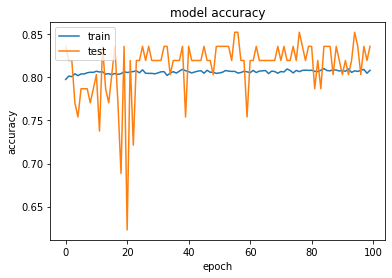

In [84]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


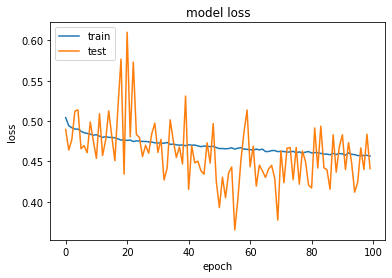

In [85]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
import numpy as np
from math import *
Max_vel=6.94
Min_acc=0.28
num_lane=3
d_for_rest_to_maxvel= Max_vel**2/(2*Min_acc)
t_for_rest_to_maxvel= Max_vel/(Min_acc)
length = np.array([8,4.8,1,11.95,5.8,2.635])
A=np.array([[12,2,7,12,1,4],[5,20,12,13,0,0],[2,4,2,1,2,15],[2,4,2,1,2,15]])
S=np.dot(A,length.T)/num_lane
T_1=np.sqrt(2*S/Min_acc)
T_vel=T_1*Min_acc
T1=np.zeros(4)
T1=np.where( S < d_for_rest_to_maxvel , T1 , t_for_rest_to_maxvel + (S-d_for_rest_to_maxvel)/Max_vel )
T2=np.zeros(4)
T2=np.where( S > d_for_rest_to_maxvel , T2 , T_1 )
Time=T1+T2

In [7]:

import csv
import numpy as np
import math


In [13]:
RoadtoOpen='A1'
b=[]
row=0
col=0
size=[1,2,3,4,5,6]
#size of [truck,car,bike,bus,ambulance,cng]
length=0


In [14]:
with open('3rdstepdata.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        b.append(row)
        print(row)
rows=(len(b))
col=len(row)
time=np.zeros((1,col-1))

['Road Name', 'East', 'West', 'North', 'South']
['Truck', '0', '0', '0', '0']
['Car', '100', '80', '50', '20']
['Motorcycle', '0', '0', '0', '0']
['Bus', '0', '0', '0', '0']
['Ambulance', '0', '0', '0', '0']
['Cng', '0', '0', '0', '0']


In [15]:
for i in range (1,col):
    for j in range (1,rows):
        if j == 3:
            length = length + size[j-1] * (int(b[j][i]))/2
        else:
            length = length + size[j-1] * (int(b[j][i]))
    time[0,i-1]=math.sqrt((2*length)/0.28)
    length=0
print(time)

[[37.7964473  33.80617019 26.72612419 16.90308509]]


In [16]:
if RoadtoOpen =='A1':
    finaltime=time[0,0]
if RoadtoOpen =='A2':
    finaltime=time[0,1]
if RoadtoOpen =='A3':
    finaltime=time[0,2]
if RoadtoOpen =='A4':
    finaltime=time[0,3]

In [17]:
finaltime

37.79644730092272